# Book 5 (Categorizing and Tagging Words)
#### SIDE-39-GAB
#### Bastomy - 1301178418 - Text Mining

## 5. Categorizing and Tagging Words

Tag yang di sediakan nltk adalah sebagai berikut

<img src="pos_tagging.png"/>

### 1   Using a Tagger

In [1]:
import nltk
from nltk import word_tokenize

nltk memberikan library untuk Pos-Tagging , dimana pos tagging ini membutuhkan input berupa token, untuk contoh penggunaanya dapat di lihat pada kode dibawah ini

In [2]:
text = word_tokenize("I very happy right now")
nltk.pos_tag(text)

[('I', 'PRP'), ('very', 'RB'), ('happy', 'JJ'), ('right', 'NN'), ('now', 'RB')]

agar penggunaan lebih mudah kita akan membuat sebuah fungsi untuk menggunakan pos-tagging tersebut, seperti kode dibawah ini

In [3]:
def pos_tagging(string):
    token = word_tokenize(string)
    return nltk.pos_tag(token)

In [4]:
pos_tagging("Nice to meet you!")

[('Nice', 'NNP'), ('to', 'TO'), ('meet', 'VB'), ('you', 'PRP'), ('!', '.')]

In [5]:
pos_tagging("They refuse to permit us to obtain the refuse permit")

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

pada kode dibawah kita akan menggunakan words yang di sediakan korpus brown dan mencari similarity nya

In [6]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [7]:
text.similar('handsome')

black and good strong time learned true young clear proud the is one
seen all there more made about research


In [8]:
text.similar("excellent")

the used important available there reasonable made good high needed
assigned is effective seen not fair his out registered first


In [9]:
text.similar('happy')

that made and not just good much important possible it all told right
necessary in for on there left close


### 2   Tagged Corpora

### 2.1   Representing Tagged Tokens

kita bisa menambahkan tag dan kata yang kita mau sendiri dengan menggunakan kode dibawah ini

In [10]:
tagged_token = nltk.tag.str2tuple('fly/NN')

In [11]:
tagged_token

('fly', 'NN')

In [12]:
tagged_token = nltk.tag.str2tuple('pintar/JJ')

In [13]:
tagged_token

('pintar', 'JJ')

In [14]:
print(tagged_token[0])
print(tagged_token[1])

pintar
JJ


### 2.2   Reading Tagged Corpora

In [15]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

untuk mencari tag set dalam corpus brown kita bisa menggunakan kode dibawah ini

In [16]:
nltk.corpus.brown.tagged_words(tagset='smart')

[('The', 'UNK'), ('Fulton', 'UNK'), ('County', 'UNK'), ...]

In [17]:
nltk.corpus.brown.tagged_words(tagset='dummy')

[('The', 'UNK'), ('Fulton', 'UNK'), ('County', 'UNK'), ...]

tag dari corpus nps_chat yang disediakan nltk

In [18]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [19]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [20]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

### 2.3   A Universal Part-of-Speech Tagset

<img src="universal_pos.png"/>

untuk melihat tag yang paling sering muncul di categori tertentu dalam corpus brown kita bisa menggunakan kode di bawah ini

In [21]:
from nltk.corpus import brown

In [22]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

### 2.4   Nouns

pada tag juga bisa digunakan bigram dimana pasangan tag yang paling sering muncul akan membuat kemungikinan tag tersebut semakin besar untuk terpilih

In [23]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

urutan tag yang paling sering untuk NOUN dapat di lihat pada kode di atas mulai dari NOUN DET sampai dengan X

In [24]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'VERB']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'VERB',
 'PRON',
 'PRT',
 '.',
 'ADV',
 'DET',
 'CONJ',
 'ADP',
 'ADJ',
 'NUM',
 'X']

urutan tag yang paling sering untuk VERB dapat di lihat pada kode di atas mulai dari NOUN VERB sampai dengan X

### 2.5   Verbs

In [25]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
data = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

Kata yang paling sering muncul dari verb adalah sebagai berikut

In [26]:
data[:10]

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would']

untuk mengecek kata lainnya kita tinggal merubah isi dari VERB tersebut sesuai dengan tag yang ingin di cari

In [27]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
data = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'NOUN']

In [28]:
data[:10]

['%',
 'Mr.',
 'company',
 'U.S.',
 'year',
 'market',
 'New',
 'trading',
 'stock',
 'president']

In [29]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [30]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

ada cara lain untuk mencari tag yang paling sering muncul yaitu menggunakan cfd atau ConditionalFreqDist, kita tinggal memanggil seperti kode dibawah ini.

In [31]:
cfd1['task'].most_common()

[('NOUN', 3)]

In [32]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
data = list(cfd2['VBN'])

In [33]:
data[:10]

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed']

### 2.6   Adjectives and Adverbs

Dua kelas kata penting lainnya adalah kata sifat dan kata keterangan. Kata sifat menggambarkan kata benda, dan dapat digunakan sebagai pengubah (mis. Besar di pizza besar), atau dalam predikat (mis. Pizza besar). Kata sifat Bahasa Inggris dapat memiliki struktur internal (mis. Jatuh + dalam stok yang jatuh). Adverbia memodifikasi kata kerja untuk menentukan waktu, cara, tempat atau arah acara yang dijelaskan oleh kata kerja (mis. Cepat dalam stok jatuh dengan cepat). Adverbia juga dapat mengubah kata sifat (mis. Benar-benar menurut guru Mary sangat bagus).

### 2.7   Unsimplified Tags

fungsi di bawah adalah untuk mencari tag dalam corpus berdasarkan kategori tertentu

In [34]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

mencari tag NN dengan categori news pada korpus brown

In [35]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [36]:
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

Contoh lainnya

In [37]:
tagdict = findtags('JJ', nltk.corpus.brown.tagged_words(categories='news'))

In [38]:
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

JJ [('new', 147), ('such', 51), ('good', 45), ('high', 43), ('American', 40)]
JJ-HL [('special', 4), ('modest', 2), ('New', 2), ('prejudicial', 1), ('Exploratory', 1)]
JJ-NC [('dull', 1)]
JJ-TL [('New', 88), ('National', 39), ('Democratic', 35), ('White', 34), ('North', 28)]
JJR [('higher', 23), ('better', 17), ('greater', 10), ('further', 10), ('earlier', 7)]
JJR-HL [('higher', 1), ('lighter', 1), ('Younger', 1), ('Easier', 1)]
JJR-NC [('Calmer', 1)]
JJR-TL [('Greater', 2), ('Better', 1), ('Elder', 1)]
JJS [('top', 23), ('chief', 6), ('principal', 5), ('key', 4), ('main', 3)]
JJS-TL [('Chief', 2)]
JJT [('best', 26), ('largest', 10), ('greatest', 9), ('biggest', 9), ('highest', 6)]
JJT-HL [('best', 1), ('highest', 1)]


### 2.8   Exploring Tagged Corpora

In [39]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

mengecek kata tertentu dan menghitung kemunculan tag tersebut, contoh kode seperti dibawah ini

In [40]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


kata often muncul sebanyak 37 kali dalam tag VERB dan lainnnya, berikut untuk contoh lain

In [41]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'happy']
fd = nltk.FreqDist(tags)
fd.tabulate()

   .  ADV CONJ 
   2    1    1 


In [42]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)

In [43]:
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


### 3   Mapping Words to Properties Using Python Dictionaries

### 3.1   Indexing Lists vs Dictionaries

<img src="maps02.png"/>

<img src="linguistic.png"/>

### 3.2   Dictionaries in Python

kita bisa menambahkan dictiionari pada python dengan memanfaatkan object, contoh pada kode di bawah kita menggunakan colorless sebagai index dan ADJ sebagai isinya

In [44]:
pos = {}
pos['colorless'] = 'ADJ'
pos['apple'] = 'N'
pos['ideas'] = 'N'
pos['water'] = 'N'

In [45]:
pos

{'colorless': 'ADJ', 'apple': 'N', 'ideas': 'N', 'water': 'N'}

untuk menampilkan list dari pos bisa menggunakan perintah <b> list</b>

In [46]:
list(pos)

['colorless', 'apple', 'ideas', 'water']

In [47]:
for word in sorted(pos):
    print(word + ":", pos[word])

apple: N
colorless: ADJ
ideas: N
water: N


untuk menampilkan value dari pos bisa menggunakan perintah <b>values()</b>

In [48]:
list(pos.values())

['ADJ', 'N', 'N', 'N']

untuk menampilkan index atau key dari pos bisa menggunakan perintah <b>keys()</b>

In [49]:
list(pos.keys())

['colorless', 'apple', 'ideas', 'water']

untuk menampilkan keduanya bisa menggunakan perintah <b>intems()</b>

In [50]:
list(pos.items())

[('colorless', 'ADJ'), ('apple', 'N'), ('ideas', 'N'), ('water', 'N')]

### 3.3   Defining Dictionaries

ada 2 cara pendefinisian dictionary yaitu

In [51]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [52]:
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

cara kedua 

In [53]:
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

In [54]:
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

### 3.4   Default Dictionaries

secara default python akan memberi nilai 0 untuk index yang tidak di temukan seperti pada contoh di bawah, hal ini berguna untuk menghindari error apabila index atau key tidak ditemukan

In [55]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4

In [56]:
frequency['colorless']

4

In [57]:
frequency['ideas']

0

In [58]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')

In [59]:
for v in v1000:
    mapping[v] = v

In [60]:
alice2 = [mapping[v] for v in alice]
print(alice2[:40])

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK', 'UNK', 'UNK', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'UNK', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing']


In [61]:
len(set(alice2))

1001

### 3.5   Incrementally Updating a Dictionary

In [62]:
pair = ('NN', 8876)
pair[1]

8876

untuk membuat pengecekan kata akhir kita akan membutuhkan sebuah korpus untuk data tes, disini kita menggunakan corpus bahasa inggris

In [63]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')

pada perulangan dibawah akan di cek -2 artinya 2 karakter terakhir akan di cocokan untuk mendapatkan akhiran suatu kata

In [64]:
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

contoh kata yang berakhiran <b>ly</b>

In [65]:
data = last_letters['ly']
print(data[:10])

['abactinally', 'abandonedly', 'abasedly', 'abashedly', 'abashlessly', 'abbreviately', 'abdominally', 'abhorrently', 'abidingly', 'abiogenetically']


contoh kata yang berakhiran <b>st</b>

In [66]:
data = last_letters['st']
print(data[:15])

['abacist', 'abdest', 'abiogenesist', 'abiogenist', 'ablest', 'abnormalist', 'abolitionist', 'abortionist', 'abreast', 'absolutist', 'abstentionist', 'abstractionist', 'aburst', 'academist', 'acarologist']


<b>anagram</b>

In [67]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

In [68]:
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

contoh lain

In [69]:
anagrams['ahhpy']

['hypha']

### 3.6   Complex Keys and Values

In [70]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [71]:
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

In [72]:
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

### 3.7   Inverting a Dictionary

In [73]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

In [74]:
[key for (key, value) in counts.items() if value == 30]

['whence', 'These', 'face', 'divine', 'too']

In [75]:
[key for (key, value) in counts.items() if value == 25]

['Chaos',
 'cause',
 'High',
 'fiery',
 'wrath',
 'hate',
 'winds',
 'Be',
 'serve',
 'ease',
 'Whose',
 'sacred',
 'hands',
 'Maker',
 'Far',
 'Each',
 'fight',
 'law',
 'creatures',
 'back']

In [76]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())

In [77]:
print("N",pos2['N'])
print("V",pos2['V'])

N ideas
V sleep


In [78]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)

In [79]:
for key, value in pos.items():
    pos2[value].append(key)

In [80]:
print("ADV",pos2['ADV'])
print("ADJ",pos2['ADJ'])

ADV ['furiously', 'peacefully']
ADJ ['colorless', 'old']


### 4   Automatic Tagging

In [81]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

### 4.1   The Default Tagger

dari tegs TAG yang paling sering muncul adalah NN, untuk mencari tag yang paling sering muncul bisa menggunakan  nltk.FreqDist(tags).max() seperti pada contoh kode dibawah ini

In [84]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

untuk memberi tag default bisa menggunakan <b>nltk.DefaultTagger</b> seperti pada kode dibawah ini

In [86]:
raw = 'saya senang dengan pemograman python'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('saya', 'NN'),
 ('senang', 'NN'),
 ('dengan', 'NN'),
 ('pemograman', 'NN'),
 ('python', 'NN')]

In [87]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

### 4.2   The Regular Expression Tagger

In [88]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                     # nouns (default)
]

In [89]:
patterns

[('.*ing$', 'VBG'),
 ('.*ed$', 'VBD'),
 ('.*es$', 'VBZ'),
 ('.*ould$', 'MD'),
 (".*\\'s$", 'NN$'),
 ('.*s$', 'NNS'),
 ('^-?[0-9]+(.[0-9]+)?$', 'CD'),
 ('.*', 'NN')]

In [96]:
regexp_tagger = nltk.RegexpTagger(patterns)

kita akan menggunakan regex untuk tagging, kalimat dibawah akan di tag, berikut contoh kalimat dari corpus brown

In [94]:
teks = " ".join(brown_sents[3])

In [95]:
print(teks)

`` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .


berikut hasil tag kalimat diatas

In [98]:
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

contoh lainnya

In [99]:
teks = " ".join(brown_sents[2])
print(teks)

The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .


In [100]:
regexp_tagger.tag(brown_sents[2])

[('The', 'NN'),
 ('September-October', 'NN'),
 ('term', 'NN'),
 ('jury', 'NN'),
 ('had', 'NN'),
 ('been', 'NN'),
 ('charged', 'VBD'),
 ('by', 'NN'),
 ('Fulton', 'NN'),
 ('Superior', 'NN'),
 ('Court', 'NN'),
 ('Judge', 'NN'),
 ('Durwood', 'NN'),
 ('Pye', 'NN'),
 ('to', 'NN'),
 ('investigate', 'NN'),
 ('reports', 'NNS'),
 ('of', 'NN'),
 ('possible', 'NN'),
 ('``', 'NN'),
 ('irregularities', 'VBZ'),
 ("''", 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('hard-fought', 'NN'),
 ('primary', 'NN'),
 ('which', 'NN'),
 ('was', 'NNS'),
 ('won', 'NN'),
 ('by', 'NN'),
 ('Mayor-nominate', 'NN'),
 ('Ivan', 'NN'),
 ('Allen', 'NN'),
 ('Jr.', 'NN'),
 ('.', 'NN')]

In [101]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

### 4.3   The Lookup Tagger

In [103]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

contoh penggunaan baseline tagger, yaitu hanya menghitung tag yang paling banyak dan hanya mengenali tag yang tersedia

In [106]:
sent = brown.sents(categories='news')[3]

In [107]:
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

contoh lainnya

In [108]:
sent = brown.sents(categories='news')[1]
baseline_tagger.tag(sent)

[('The', 'AT'),
 ('jury', None),
 ('further', None),
 ('said', 'VBD'),
 ('in', 'IN'),
 ('term-end', None),
 ('presentments', None),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', None),
 ('Executive', None),
 ('Committee', None),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD'),
 ('over-all', None),
 ('charge', None),
 ('of', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('``', '``'),
 ('deserves', None),
 ('the', 'AT'),
 ('praise', None),
 ('and', 'CC'),
 ('thanks', None),
 ('of', 'IN'),
 ('the', 'AT'),
 ('City', None),
 ('of', 'IN'),
 ('Atlanta', None),
 ("''", "''"),
 ('for', 'IN'),
 ('the', 'AT'),
 ('manner', None),
 ('in', 'IN'),
 ('which', 'WDT'),
 ('the', 'AT'),
 ('election', None),
 ('was', 'BEDZ'),
 ('conducted', None),
 ('.', '.')]

In [109]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

In [111]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

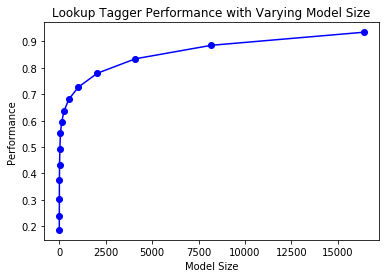

In [113]:
display()

### 4.4   Evaluation

Dalam contoh di atas, Anda akan memperhatikan penekanan pada skor akurasi. Bahkan, mengevaluasi kinerja alat tersebut adalah tema sentral dalam NLP. Ingat pipa pemrosesan dalam fig-sds; setiap kesalahan dalam output satu modul sangat banyak dikalikan dalam modul hilir.

Kami mengevaluasi kinerja tagger relatif terhadap tag yang akan ditetapkan oleh pakar manusia. Karena kami biasanya tidak memiliki akses ke seorang ahli dan hakim manusia yang tidak memihak, kami melakukan yang dilakukan dengan data uji standar emas. Ini adalah korpus yang telah dianotasi secara manual dan yang diterima sebagai standar untuk menilai dugaan sistem otomatis. Tagger dianggap benar jika tag yang ditebak untuk kata yang diberikan sama dengan tag standar emas.

Tentu saja, manusia yang merancang dan melaksanakan anotasi standar emas asli hanyalah manusia. Analisis lebih lanjut mungkin menunjukkan kesalahan dalam standar emas, atau pada akhirnya dapat menyebabkan tagset yang direvisi dan pedoman yang lebih rumit. Namun demikian, standar emas menurut definisi "benar" sejauh evaluasi tagger otomatis yang bersangkutan.

### 5   N-Gram Tagging

### 5.1   Unigram Tagging

In [115]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

unigram hanya memperhatikan kata perkata tidak melihat kata sesudah atau sebelumnya, berikut hasil dari tagging menggunakan unigram

In [119]:
print(brown_sents[2007])

['Various', 'of', 'the', 'apartments', 'are', 'of', 'the', 'terrace', 'type', ',', 'being', 'on', 'the', 'ground', 'floor', 'so', 'that', 'entrance', 'is', 'direct', '.']


In [120]:
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

contoh lainnya

In [121]:
unigram_tagger.tag(brown_sents[2])

[('The', 'AT'),
 ('September-October', 'NP'),
 ('term', 'NN'),
 ('jury', 'NN'),
 ('had', 'HVD'),
 ('been', 'BEN'),
 ('charged', 'VBN'),
 ('by', 'IN'),
 ('Fulton', 'NP-TL'),
 ('Superior', 'JJ-TL'),
 ('Court', 'NN-TL'),
 ('Judge', 'NN-TL'),
 ('Durwood', 'NP'),
 ('Pye', 'NP'),
 ('to', 'TO'),
 ('investigate', 'VB'),
 ('reports', 'NNS'),
 ('of', 'IN'),
 ('possible', 'JJ'),
 ('``', '``'),
 ('irregularities', 'NNS'),
 ("''", "''"),
 ('in', 'IN'),
 ('the', 'AT'),
 ('hard-fought', 'JJ'),
 ('primary', 'NN'),
 ('which', 'WDT'),
 ('was', 'BEDZ'),
 ('won', 'VBD'),
 ('by', 'IN'),
 ('Mayor-nominate', 'NN-TL'),
 ('Ivan', 'NP'),
 ('Allen', 'NP'),
 ('Jr.', 'NP'),
 ('.', '.')]

### 5.2   Separating the Training and Testing Data

In [123]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

pada kasus ini data dibagi menjadi 2 bagian yaitu 90 persen sebagai training dan 90 persen sebagai testing, dimana terdapat 4160 data training

In [125]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

pada pemisahan data ini mendapatkan akurasi sebesar 0.81 persen

### 5.3   General N-Gram Tagging

<img src="tag-context.png"/>

berbeda dengan unigram pada bigram terdapat 2 perbandingan yaitu kata sekarang dan kata sesudahnya, hal ini akan membuat keterkaitan kata satu dengan kata berikutnya

berikut contoh dari tagging menggunakan bigram

In [126]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

contoh lainnya

In [132]:
bigram_tagger.tag(brown_sents[4])

[('The', 'AT'),
 ('jury', 'NN'),
 ('said', 'VBD'),
 ('it', 'PPO'),
 ('did', 'DOD'),
 ('find', 'VB'),
 ('that', 'CS'),
 ('many', 'AP'),
 ('of', 'IN'),
 ("Georgia's", 'NP$'),
 ('registration', 'NN'),
 ('and', 'CC'),
 ('election', 'NN'),
 ('laws', 'NNS'),
 ('``', '``'),
 ('are', 'BER'),
 ('outmoded', 'JJ'),
 ('or', 'CC'),
 ('inadequate', 'JJ'),
 ('and', 'CC'),
 ('often', 'RB'),
 ('ambiguous', 'JJ'),
 ("''", "''"),
 ('.', '.')]

### 5.4   Combining Taggers

In [133]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

dengan menggabungkan antara unigram dan bigram akurasi meningkat menjadi 84 persen yang sebelumnya hanya 81 persen

### 5.5   Tagging Unknown Words

Pendekatan kami untuk menandai kata-kata yang tidak dikenal masih menggunakan backoff untuk tagger ekspresi reguler atau tagger default. Ini tidak dapat memanfaatkan konteks. Jadi, jika tagger kami menemukan kata blog, tidak terlihat selama pelatihan, tag itu akan diberi tag yang sama, terlepas dari apakah kata ini muncul dalam konteks blog atau blog. Bagaimana kita bisa melakukan yang lebih baik dengan kata-kata yang tidak dikenal ini, atau hal-hal yang tidak perlu kosa kata?

Metode yang berguna untuk menandai kata-kata yang tidak dikenal berdasarkan konteks adalah dengan membatasi kosakata dari tagger ke n kata yang paling sering, dan untuk mengganti setiap kata lain dengan kata khusus UNK menggunakan metode yang ditunjukkan pada 3. Selama pelatihan, tagger unigram akan mungkin belajar bahwa UNK biasanya merupakan kata benda. Namun, penanda n-gram akan mendeteksi konteks di mana ia memiliki beberapa tag lain. Misalnya, jika kata sebelumnya adalah (ditandai TO), maka UNK mungkin akan ditandai sebagai kata kerja.

### 5.6   Storing Taggers

In [135]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [136]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [137]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

cotoh lain

In [138]:
text = "My mother was cooking a corn patty."
tokens = text.split()
tagger.tag(tokens)

[('My', 'PP$'),
 ('mother', 'NN'),
 ('was', 'BEDZ'),
 ('cooking', 'NN'),
 ('a', 'AT'),
 ('corn', 'NN'),
 ('patty.', 'NN')]

### 5.7   Performance Limitations

In [140]:
cfd = nltk.ConditionalFreqDist(
    ((x[1], y[1], z[0]), z[1])
    for sent in brown_tagged_sents
    for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [143]:
test_tags = [tag for sent in brown.sents(categories='editorial')
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]

In [145]:
print(nltk.ConfusionMatrix(gold_tags, test_tags))    

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### 6   Transformation-Based Tagging

In [146]:
from nltk.tbl import demo as brill_demo
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

### 7   How to Determine the Category of a Word

<ul>
	<li>7.1   Morphological Clues</li>
	<li>7.2   Syntactic Clues</li>
	<li>7.3   Semantic Clues</li>
	<li>7.4   New Words</li>
	<li>7.5   Morphology in Part of Speech Tagsets</li>
</ul>

### 8   Summary

<ul>
	<li>
		Kata-kata dapat dikelompokkan ke dalam kelas-kelas, seperti kata benda, kata kerja, kata sifat, dan kata keterangan. Kelas-kelas ini dikenal sebagai kategori leksikal atau bagian dari pidato. Bagian-bagian ucapan diberikan label pendek, atau tag, seperti NN, VB,
	</li>
	<li>
		Proses penetapan bagian kata secara otomatis ke kata-kata dalam teks disebut penandaan bagian-of-speech, penandaan POS, atau hanya penandaan.
	</li>
	<li>
		Penandaan otomatis adalah langkah penting dalam pipa NLP, dan berguna dalam berbagai situasi termasuk: memprediksi perilaku kata-kata yang sebelumnya tidak terlihat, menganalisis penggunaan kata dalam korpora, dan sistem text-to-speech.
	</li>
	<li>
		Beberapa korpora linguistik, seperti Brown Corpus, telah ditandai POS.
	</li>
	<li>
		Berbagai metode pemberian tag dimungkinkan, mis. tagger default, tagger ekspresi reguler, tagger unigram dan tagger n-gram. Ini dapat dikombinasikan menggunakan teknik yang dikenal sebagai backoff.
	</li>
	<li>
		Taggers dapat dilatih dan dievaluasi menggunakan korpora yang ditandai.
	</li>
	<li>
		Backoff adalah metode untuk menggabungkan model: ketika model yang lebih khusus (seperti tagger bigram) tidak dapat menetapkan tag dalam konteks yang diberikan, kami mundur ke model yang lebih umum (seperti tagger unigram).
	</li>
	<li>
		Penandaan bagian-ucapan adalah contoh awal yang penting dari tugas klasifikasi urutan di NLP: keputusan klasifikasi pada satu titik dalam urutan menggunakan kata-kata dan tag dalam konteks lokal.
	</li>
	<li>
		Kamus digunakan untuk memetakan antara jenis informasi yang berubah-ubah, seperti string dan angka: freq ['cat'] = 12. Kami membuat kamus menggunakan notasi kurung: pos = {}, pos = {'furiously': ' adv ',' ide ':' n ',' tidak berwarna ':' adj '}.
	</li>
	<li>
		Tager N-gram dapat didefinisikan untuk nilai n yang besar, tetapi begitu n lebih besar dari 3 biasanya kita menghadapi masalah data yang jarang; bahkan dengan sejumlah besar data pelatihan kami hanya melihat sebagian kecil dari konteks yang memungkinkan.
	</li>
	<li>
		Penandaan berbasis transformasi melibatkan mempelajari serangkaian aturan perbaikan dari bentuk "tag perubahan s ke tag t dalam konteks c", di mana setiap aturan memperbaiki kesalahan dan mungkin memperkenalkan sejumlah kesalahan (lebih kecil).
	</li>
</ul>